EDA



📌 First 5 rows:
   SqFt  Bedrooms  Bathrooms  Age  LocationScore          Price
0  3774         2          1   26       6.868838  639988.894776
1  1460         2          1   21       8.028274  395923.046783
2  1894         1          4   36       8.123172  512786.483588
3  1730         5          2   26       6.422228  601236.603910
4  1695         3          4   28       5.604747  491418.441825

📌 Shape of Data: (1500, 6)

📌 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SqFt           1500 non-null   int64  
 1   Bedrooms       1500 non-null   int64  
 2   Bathrooms      1500 non-null   int64  
 3   Age            1500 non-null   int64  
 4   LocationScore  1500 non-null   float64
 5   Price          1500 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 70.4 KB
None

📌 Descriptive Stats:
              SqFt     Bed

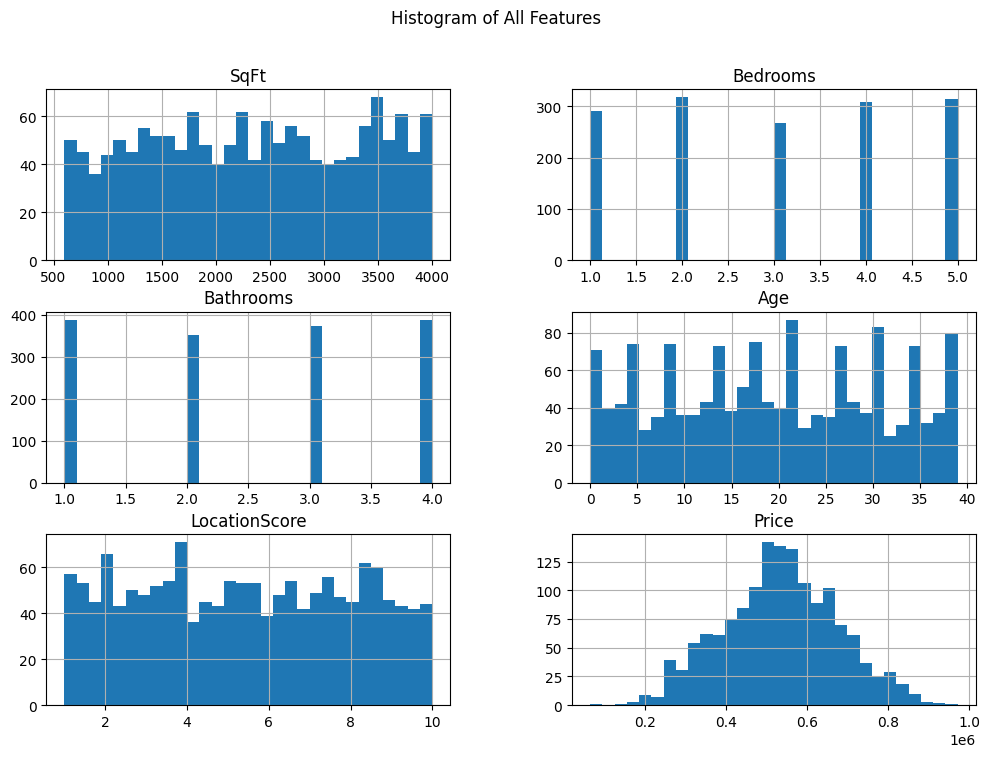

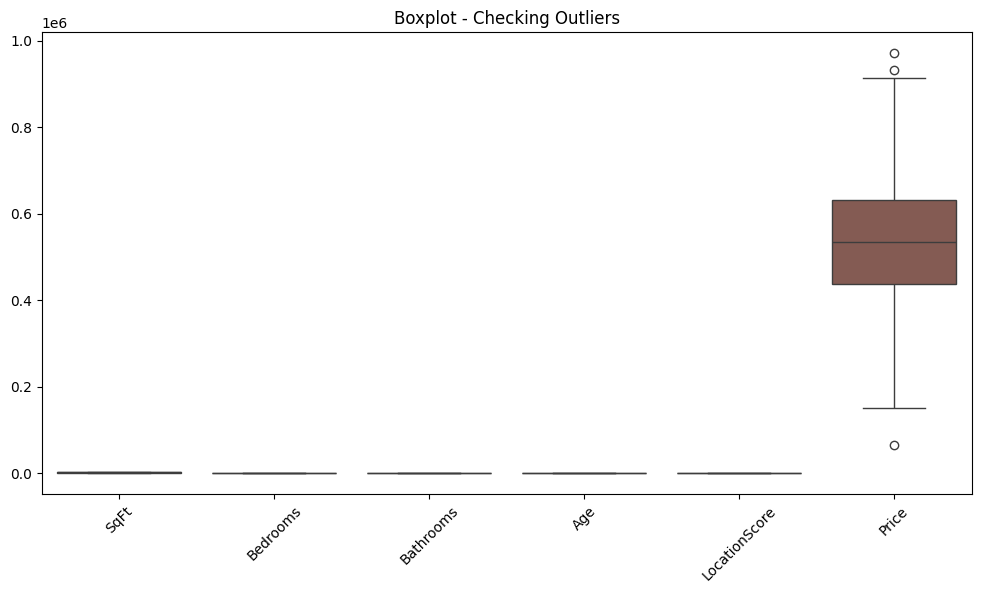

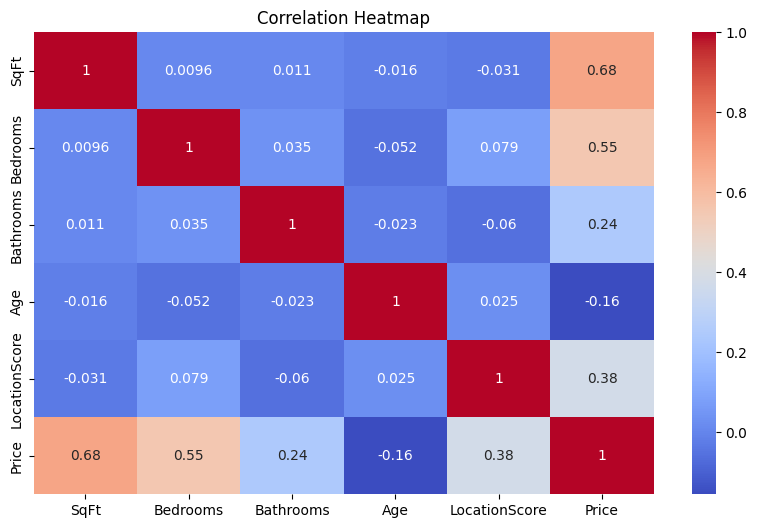

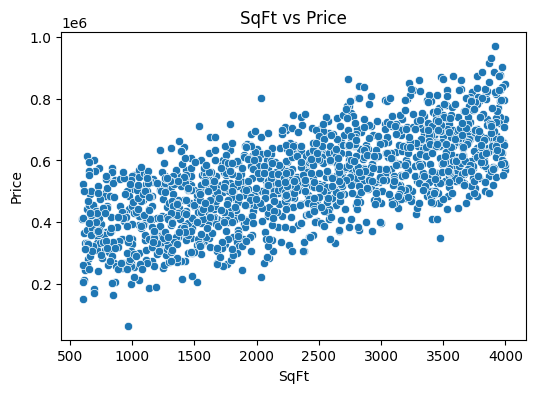

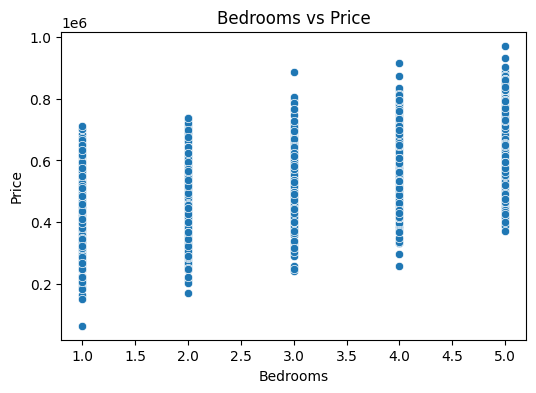

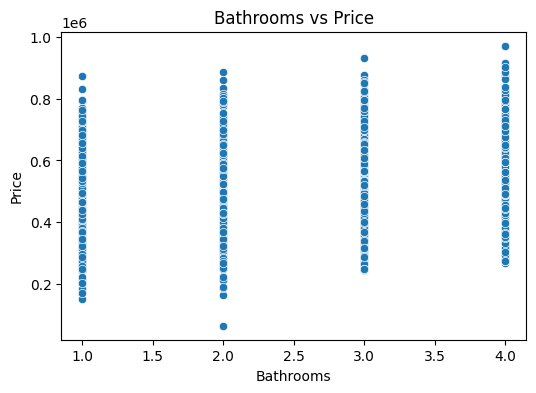

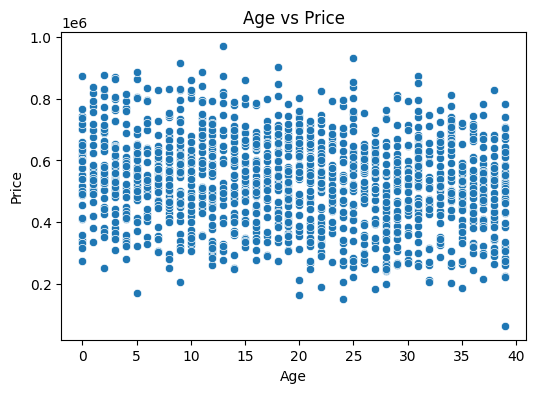

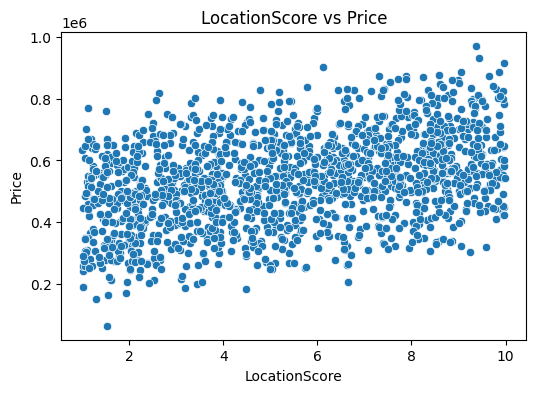

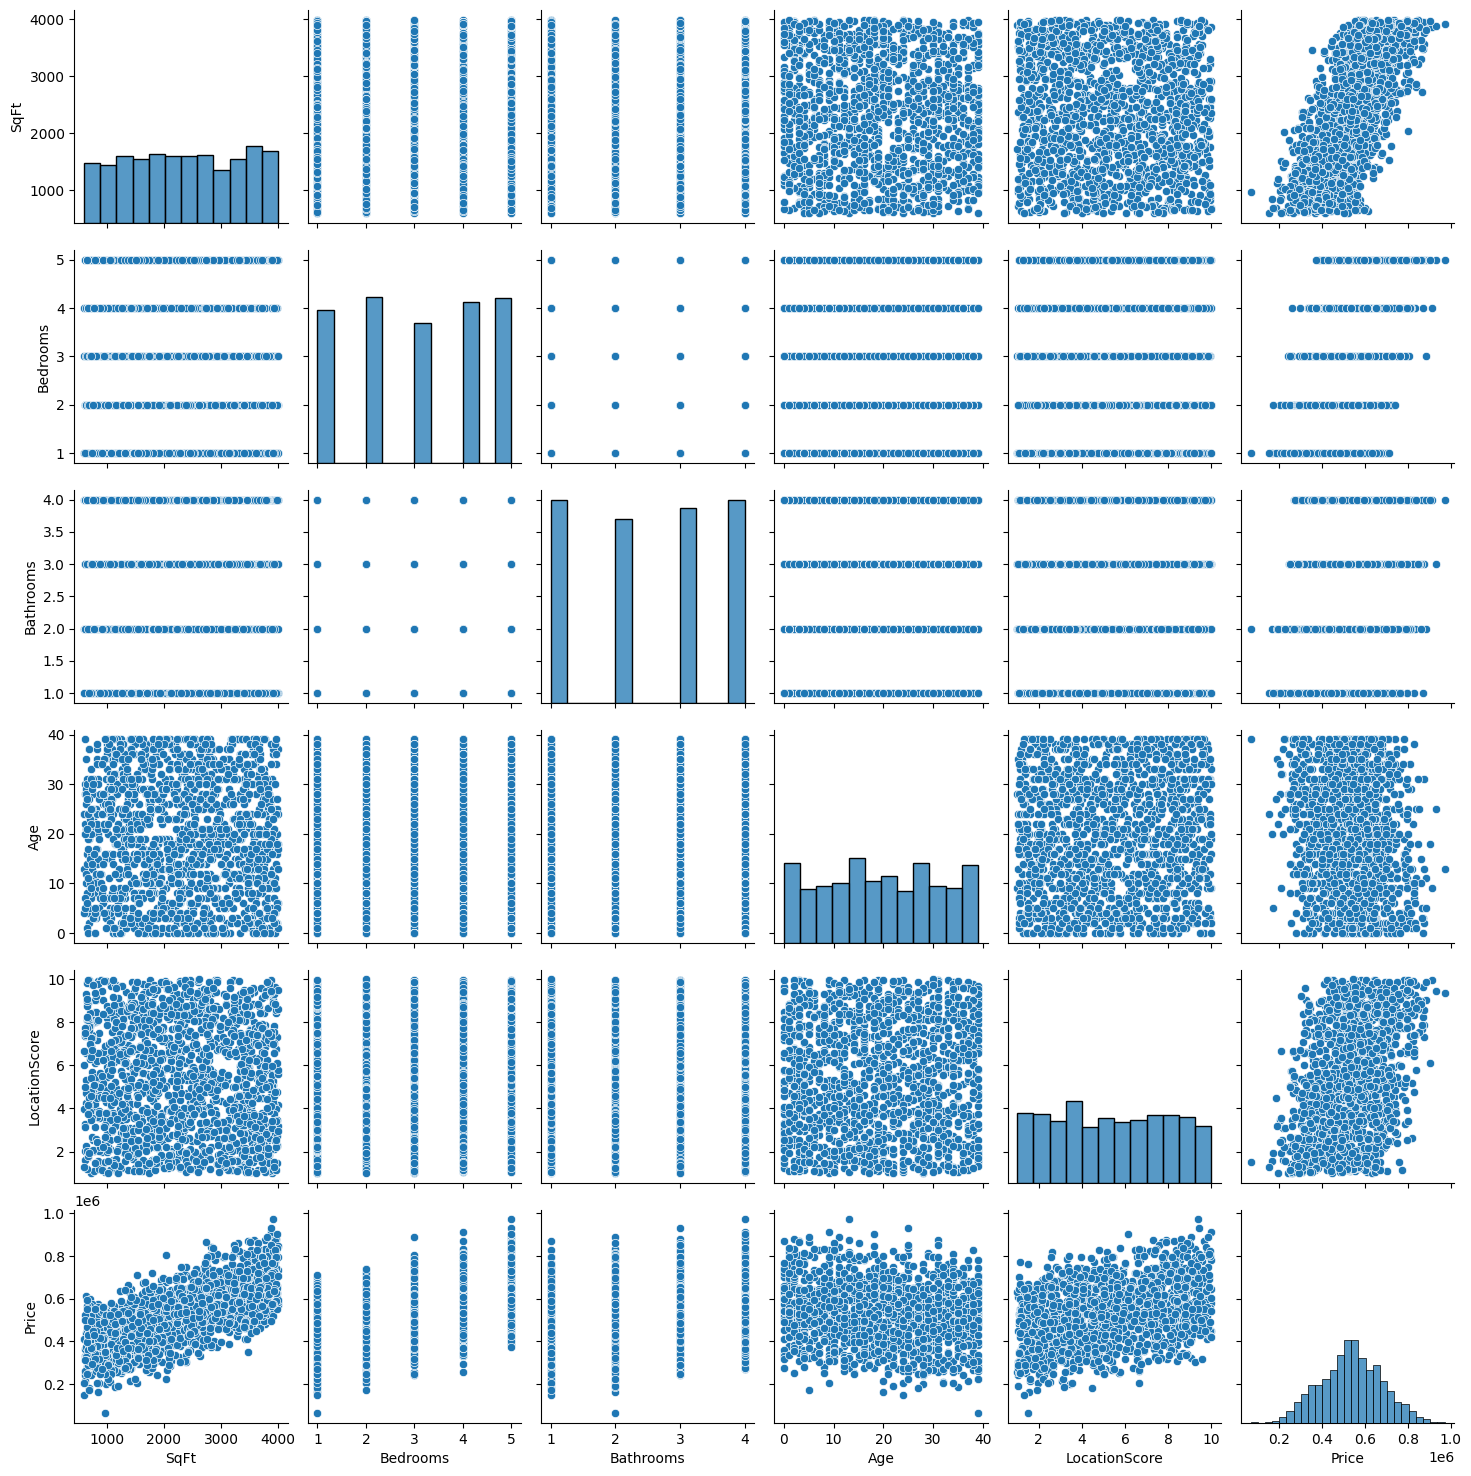

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# LOAD DATA

df = pd.read_csv("medium_regression_house_price_1500.csv")


# 3. BASIC OVERVIEW

print("\n📌 First 5 rows:")
print(df.head())

print("\n📌 Shape of Data:", df.shape)

print("\n📌 Info:")
print(df.info())

print("\n📌 Descriptive Stats:")
print(df.describe())


# 4. CHECK FOR MISSING VALUES

print("\n📌 Missing Values:")
print(df.isnull().sum())


# 5. CHECK DUPLICATES

print("\n📌 Duplicate Rows:", df.duplicated().sum())

# 6. UNIVARIATE ANALYSIS

df.hist(figsize=(12,8), bins=30)
plt.suptitle("Histogram of All Features")
plt.show()

# 7. BOX PLOTS (OUTLIER CHECK)

plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot - Checking Outliers")
plt.xticks(rotation=45)
plt.show()


# 8. CORRELATION MATRIX

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# 9. PRICE RELATIONSHIP WITH FEATURES

for col in df.columns:
    if col != "Price":
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df["Price"])
        plt.title(f"{col} vs Price")
        plt.show()

# ================================
# 10. PAIRPLOT
# ================================
sns.pairplot(df)
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


train test split scaling 

In [4]:
df = pd.read_csv("medium_regression_house_price_1500.csv")
df.head()

X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


ANN

In [5]:
model = Sequential()

model.add(Dense(32, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))   # regression output layer


c:\Users\HP\Desktop\deep learning\myenv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [7]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 299093131264.0000 - mae: 527676.1875 - val_loss: 302589018112.0000 - val_mae: 533987.1875
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 299091853312.0000 - mae: 527674.9375 - val_loss: 302587281408.0000 - val_mae: 533985.5625
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 299089526784.0000 - mae: 527672.7500 - val_loss: 302584365056.0000 - val_mae: 533982.8125
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 299085856768.0000 - mae: 527669.3125 - val_loss: 302579548160.0000 - val_mae: 533978.2500
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 299079892992.0000 - mae: 527663.8750 - val_loss: 302571978752.0000 - val_mae: 533971.3750
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 299070914560.0000 - mae: 527655.4375 - val_loss: 302560804864.0000 - val_mae: 533961.1875
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 299057840128.0000 - mae: 527643.6250 - val_loss: 3025

PREDICT

In [8]:
y_pred = model.predict(X_test_scaled)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


METRICES

In [9]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)


MSE: 309398302786.49
RMSE: 556235.8337849963
MAE: 540796.9918055177
R2 Score: -15.41845146619982


LOOSE CURVE

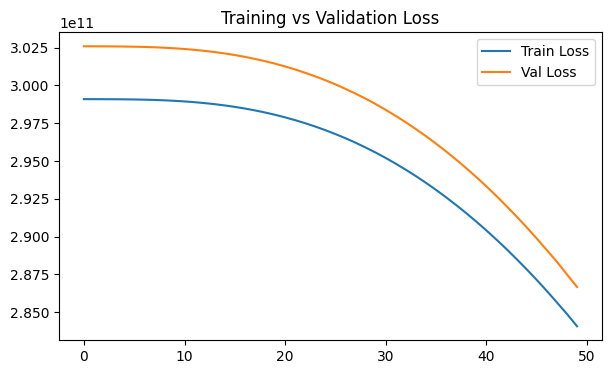

In [10]:
plt.figure(figsize=(7,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


ACTUAL VS PREDICTED

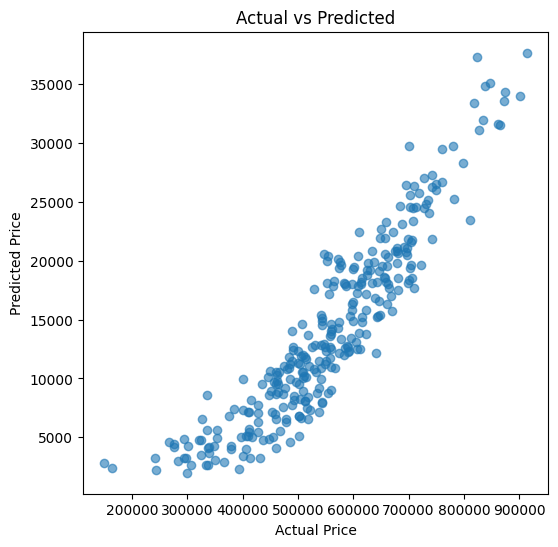

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()
